In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import courseworkb
import importlib

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'courseworkb' from '/home/olivermcevoy/AstroCourseworkB/courseworkb.py'>

In [2]:
target =  'Kepler-48'
kepler_dataframe, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info(target)


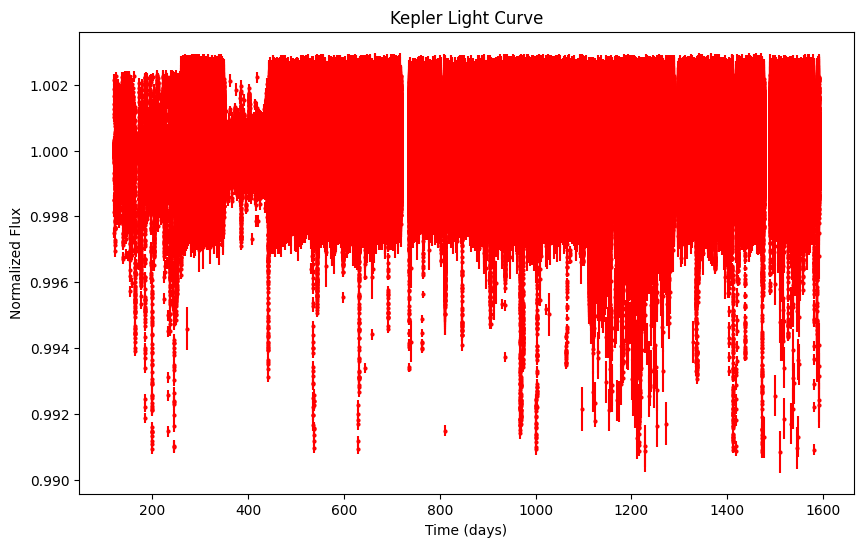

In [3]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


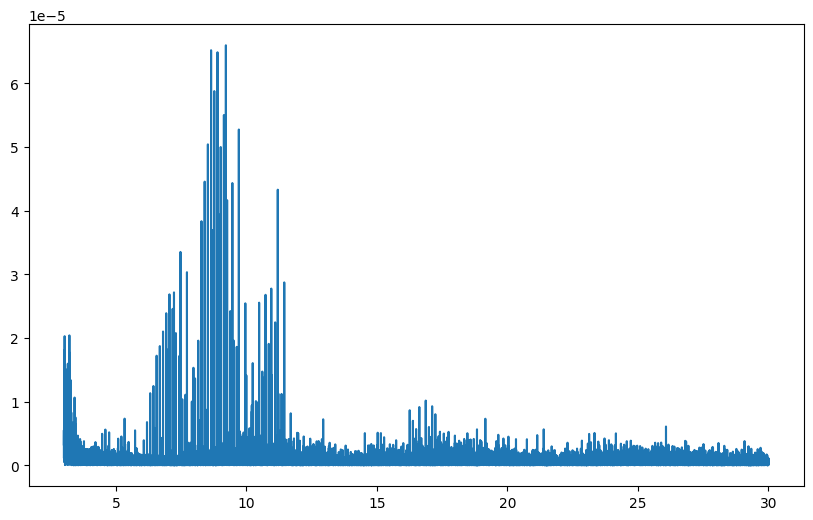

computing second periodogram
Lomb-Scargle Periodogram analysis done


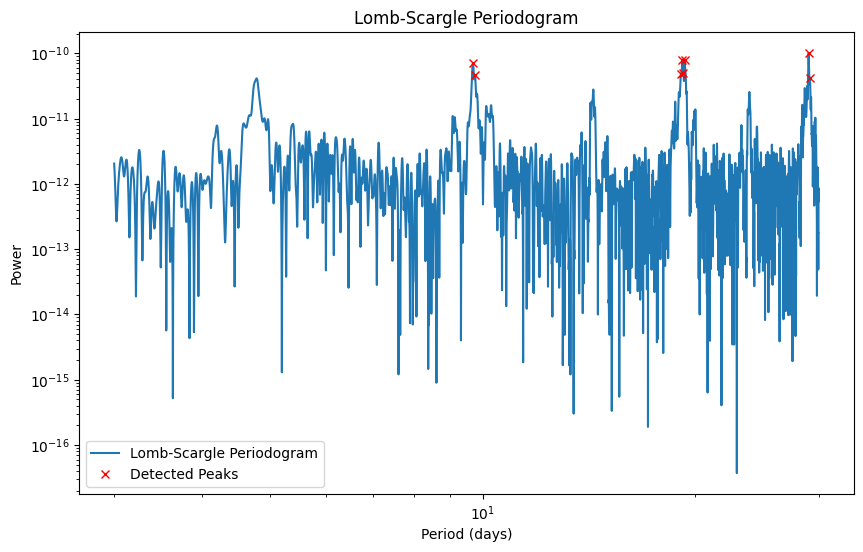

In [4]:

peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=20000)

In [5]:
results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve
)





Analyzing period 9.69 days...
Analyzing period 9.75 days...
Analyzing period 19.12 days...
Analyzing period 19.21 days...
Analyzing period 19.28 days...
Analyzing period 19.35 days...
Analyzing period 29.02 days...
Analyzing period 29.15 days...
Best Period: 9.673905972526349, Best Duration: 0.1, Best Transit Time: 125.3415707876485
Best Period: 9.673982688033291, Best Duration: 0.1, Best Transit Time: 125.3385707876485
Best Period: 19.347656971807485, Best Duration: 0.1, Best Transit Time: 125.3495707876485
Best Period: 19.34794727585164, Best Duration: 0.1, Best Transit Time: 125.3395707876485
Best Period: 19.347983020213118, Best Duration: 0.1, Best Transit Time: 125.3375707876485
Best Period: 19.347942907196366, Best Duration: 0.1, Best Transit Time: 125.34057078764849
Best Period: 29.022071783157116, Best Duration: 0.1, Best Transit Time: 144.6845707876485
Best Period: 29.02152690142758, Best Duration: 0.1, Best Transit Time: 144.6955707876485


In [6]:
results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,3,0.01)

Checking period 9.67 days...
Unique period found: 9.67 days
Checking period 19.35 days...
Checking period 29.02 days...


/home/olivermcevoy/AstroCourseworkB/courseworkb.py:214: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/olivermcevoy/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


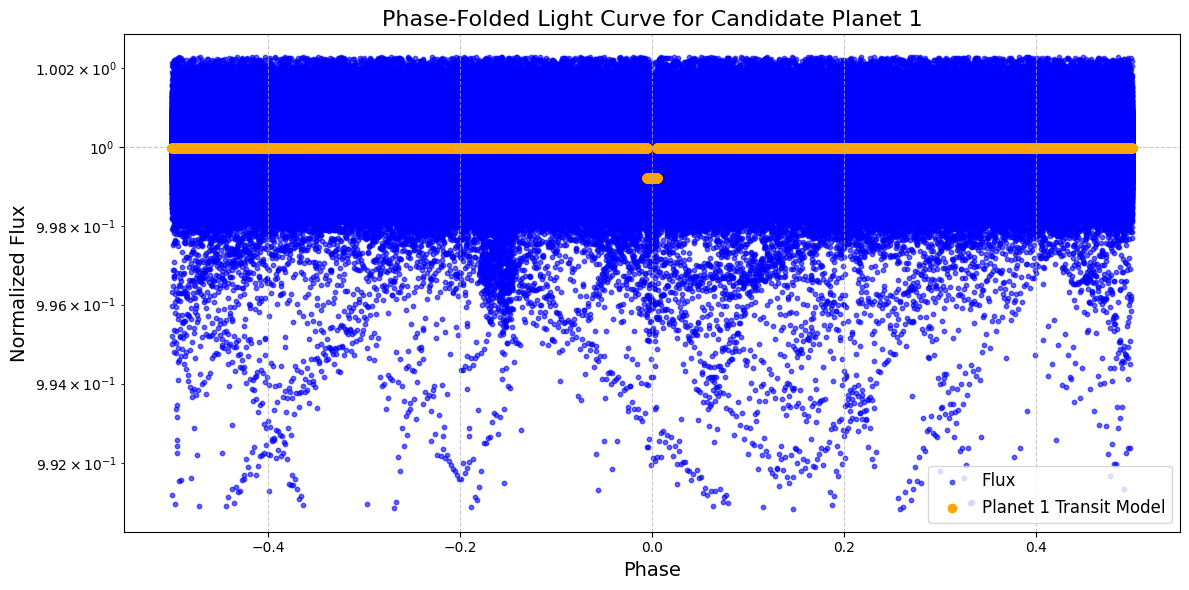

In [7]:
courseworkb.plot_phase_folded_light_curves(kepler_dataframe['time'].values, kepler_dataframe['flux'].values, results_list)

In [8]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 0.873 Solar Radii
Stellar Temperature: 5192 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 9.69 days
  Refined Period = 9.67 days
  Transit Depth  = 7.51e-04
  Transit Duration = 0.10 days
  Power = 46854.82
----------------------------------------
Best Transit Candidate: Period = 9.67 days, Depth = 7.51e-04
Estimated Planet Radius: 0.024 Solar Radii
Estimated Planet Radius: 2.610 Earth Radii
Estimated Planet Radius: 0.238 Jupiter Radii
